<a href="https://colab.research.google.com/github/cisnux-seed/machine-learning-course/blob/main/week_5/eda_best_seller_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NIM: 1103200032
## Name: Fajra Risqulla
## Class: TK-44-06

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
#Standardisasi dengan StandardScaler pada data latih
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [78]:
#load dataset
url = '/content/drive/MyDrive/sample_data/bestsellers with categories.csv'
books = pd.read_csv(url)
books

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [79]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [80]:
# print statistic
books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


<Axes: xlabel='User Rating'>

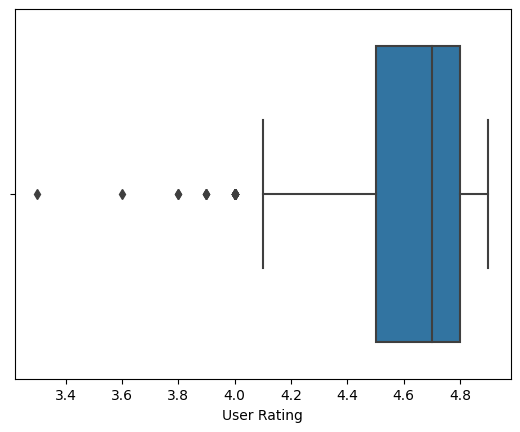

In [81]:
sns.boxplot(x=books['User Rating'])

<Axes: xlabel='Price'>

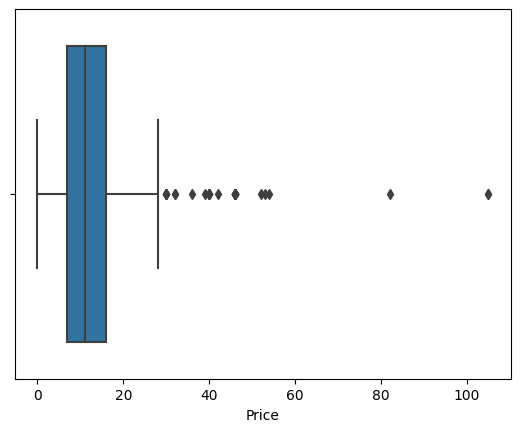

In [82]:
sns.boxplot(x=books['Price'])

<Axes: xlabel='Reviews'>

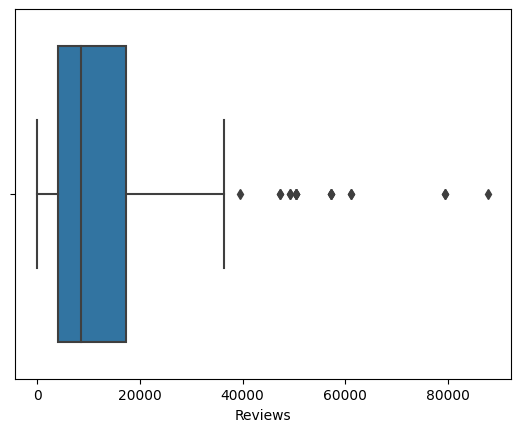

In [83]:
sns.boxplot(x=books['Reviews'])

<Axes: xlabel='Year'>

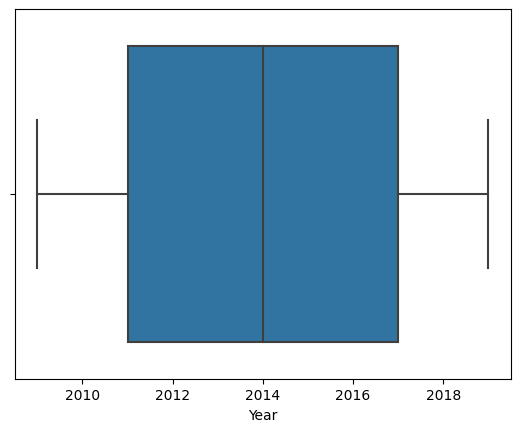

In [84]:
sns.boxplot(x=books['Year'])

Membuat batas atas dan batas bawah

Batas bawah = Q1 - 1.5 * IQR Batas atas = Q3 + 1.5 * IQR

In [85]:
Q1 = books.quantile(0.25)
Q3 = books.quantile(0.75)
IQR=Q3-Q1
books=books[~((books<(Q1-1.5*IQR))|(books>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
books.shape

<ipython-input-85-1198aefaa4f3>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = books.quantile(0.25)
<ipython-input-85-1198aefaa4f3>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = books.quantile(0.75)
<ipython-input-85-1198aefaa4f3>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  books=books[~((books<(Q1-1.5*IQR))|(books>(Q3+1.5*IQR))).any(axis=1)]


(486, 7)

In [86]:
books.describe()

,User Rating,Reviews,Price,Year
count,486.000000,486.000000,486.000000,486.000000
mean,4.650412,10627.748971,10.919753,2014.067901
std,0.176535,8264.848456,5.876367,3.229618
min,4.100000,37.000000,0.000000,2009.000000
25%,4.600000,3836.250000,6.000000,2011.000000
50%,4.700000,8018.000000,10.000000,2014.000000
75%,4.800000,16163.250000,14.000000,2017.000000
max,4.900000,36348.000000,28.000000,2019.000000


Dataset sudah bersih.

<Axes: xlabel='Price'>

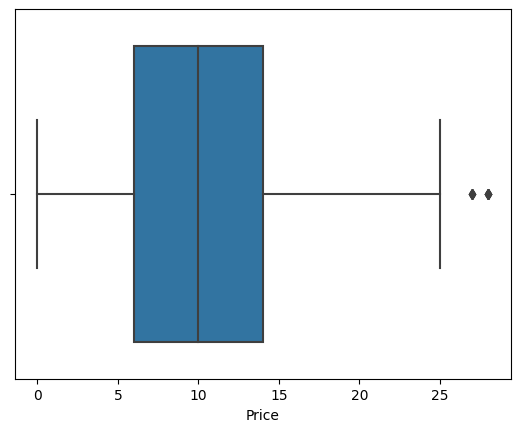

In [87]:
#tes lihat satu visualisasi boxplot
sns.boxplot(x=books['Price'])

In [88]:
#fitur dataset numerical
numerical_features = ['Price', 'Year', 'User Rating', 'Reviews']

**Analisis Numerical Feature**

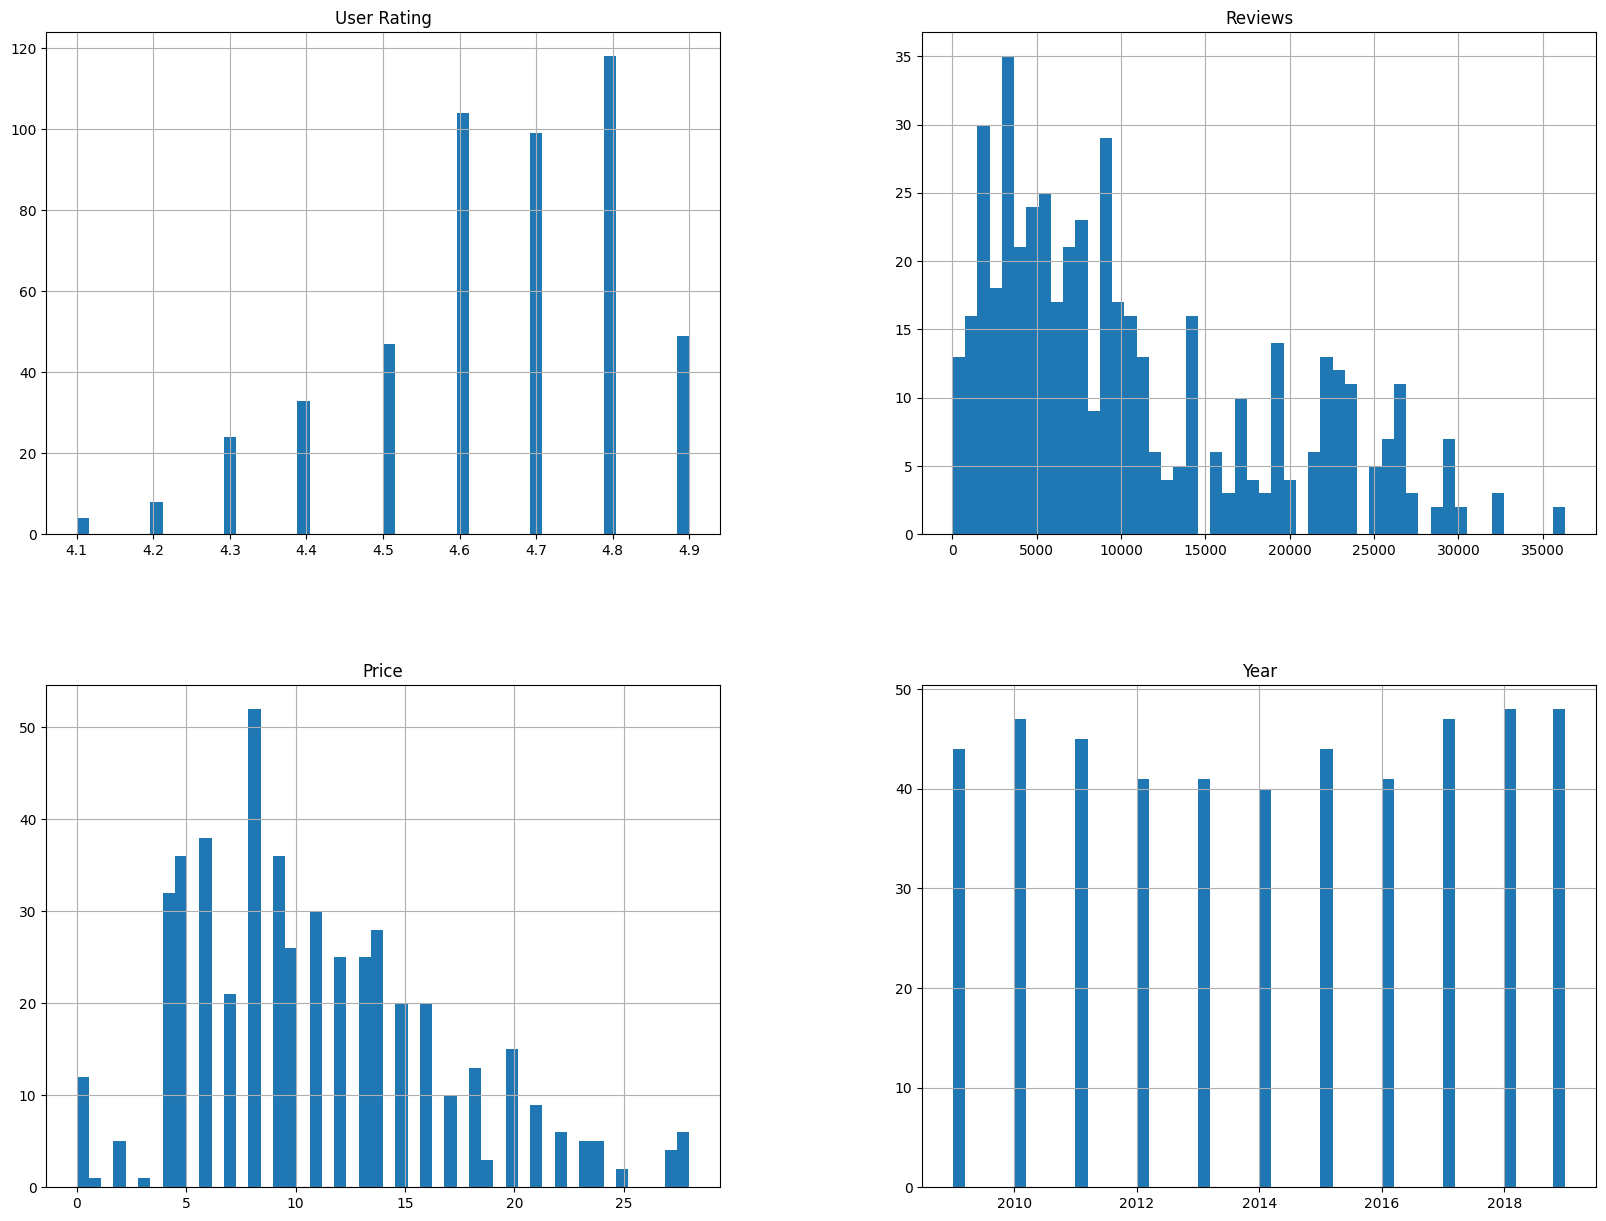

In [89]:
books.hist(bins=50, figsize=(20,15))
plt.show()

Buku best sellers terbanyak berada pada tahun 2018

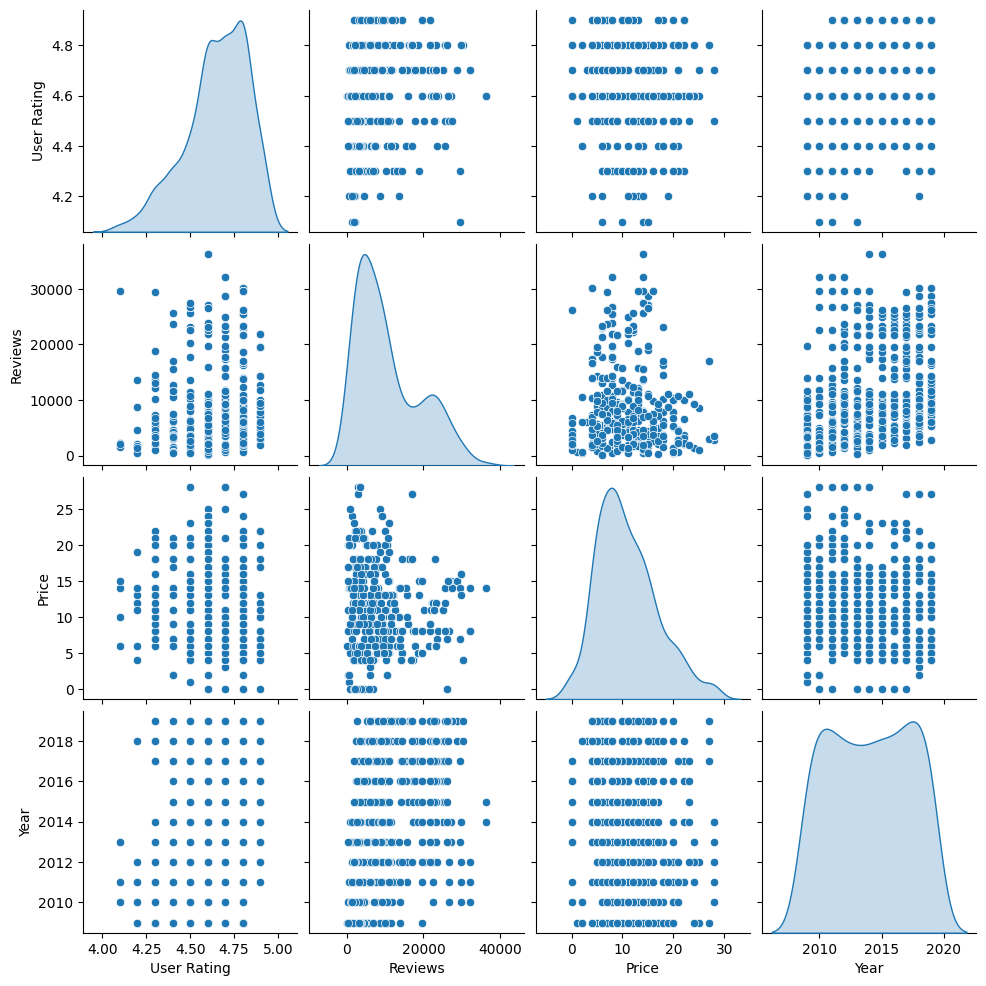

In [90]:
#mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(books, diag_kind = 'kde')

In [95]:
# Buat objek PCA dengan jumlah komponen yang diinginkan
n_components = 2  # Misalnya, ingin menggunakan 2 komponen
pca = PCA(n_components=n_components)

In [100]:
features = ['Year', 'User Rating', 'Reviews']
X = books[features]
y = books['Price']  # Target 'Price'

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)
# Buat objek PCA dengan jumlah komponen yang diinginkan
n_components = 2  # Misalnya, ingin menggunakan 2 komponen
pca = PCA(n_components=n_components)

# Fit dan transformasi data menggunakan PCA
X_pca = pca.fit_transform(X)

StandardScaler: standarisasi fitur dengan cara mengurangi setiap nilai pada kumpulan data dengan nilai rata-rata, kemudian dibagi dengan deviasi standar.

In [101]:
scaler = StandardScaler()
scaler.fit(X_train[features])
X_train[features] = scaler.transform(X_train.loc[:, features])
X_train[features].head()

,Year,User Rating,Reviews
373,-0.361388,-0.289797,-0.926970
60,-1.614776,-0.289797,-1.126903
465,1.205345,-0.289797,1.867182
450,1.205345,-1.420524,-0.464818
167,0.265305,0.275566,1.688490


In [102]:
X_train[features].describe().round(4)

,Year,User Rating,Reviews
count,437.0000,437.0000,437.0000
mean,-0.0000,0.0000,-0.0000
std,1.0011,1.0011,1.0011
min,-1.6148,-3.1166,-1.3074
25%,-0.9881,-0.2898,-0.8140
50%,-0.0480,0.2756,-0.2928
75%,0.8920,0.8409,0.7336
max,1.5187,1.4063,3.0502
